# **Dataset & Fraud Detection**

## Objectives

* The objectives are to use AI tools to balance the dataset, generate data on where it is taking place, and produce visualisations.

## Inputs

* I will load in the ecommerce_transactions_cleaned dataset.

## Outputs

* A balanced dataset, data, and visualisations.

## Additional Comments

* Copilot will be used for this task to see how AI completes this task.



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\rayaf\\OneDrive\\Documents\\global-store\\online_store\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\rayaf\\OneDrive\\Documents\\global-store\\online_store'

In [4]:
import pandas as pd

# Stage 1

#### Loading the Dataset

In [5]:
fraud_df = pd.read_csv('../online_store/data/balanced_data/ecommerce_transactions_cleaned.csv')
fraud_df.head()

,Transaction_ID,User_Name,Age,Country,Product_Category,Purchase_Amount,Payment_Method,Transaction_Date,Year,Month,Day,Product_Category_Code,Segment
0,33554,Isabella Lewis,24,Japan,Toys,579.51,Cash on Delivery,2024-01-16,2024,1,16,7,1
1,9428,Elijah Rodriguez,52,Germany,Electronics,78.18,PayPal,2023-04-19,2023,4,19,3,2
2,200,Ava Hall,62,UK,Toys,713.08,Debit Card,2024-03-05,2024,3,5,7,0
3,12448,Ava Allen,63,Brazil,Grocery,474.14,Credit Card,2024-12-01,2024,12,1,4,2
4,39490,Emma Lewis,52,USA,Home & Kitchen,266.15,Debit Card,2024-01-19,2024,1,19,5,2


# Stage 2

#### Balancing the Dataset

In [6]:
from sklearn.utils import resample

# Check class distribution before balancing
print(fraud_df['Segment'].value_counts())

# Perform random oversampling to balance the classes

# Separate majority and minority classes
majority_class = fraud_df['Segment'].value_counts().idxmax()
dfs = []
max_count = fraud_df['Segment'].value_counts().max()

for segment in fraud_df['Segment'].unique():
    df_segment = fraud_df[fraud_df['Segment'] == segment]
    if len(df_segment) < max_count:
        df_segment_balanced = resample(df_segment, 
                                       replace=True, 
                                       n_samples=max_count, 
                                       random_state=42)
    else:
        df_segment_balanced = df_segment
    dfs.append(df_segment_balanced)

balanced_fraud_df = pd.concat(dfs).sample(frac=1, random_state=42).reset_index(drop=True)

# Check class distribution after balancing
print(balanced_fraud_df['Segment'].value_counts())

Segment
3    2612
1    2498
2    2469
0    2421
Name: count, dtype: int64
Segment
0    2612
1    2612
3    2612
2    2612
Name: count, dtype: int64


# Stage 3

Detecting Fraud 

In [7]:
# The 'Segment' column in balanced_fraud_df appears to be the label for fraud detection.
# Let's check the unique values in 'Segment' to understand the classes.
print("Unique values in 'Segment':", balanced_fraud_df['Segment'].unique())

# For fraud detection, typically one value (e.g., 1) represents fraud and another (e.g., 0) represents non-fraud.
# Let's assume 'Segment' == 1 indicates fraud for demonstration.
# You can adjust the label mapping as needed based on your dataset documentation.

# Example: Create a binary 'is_fraud' column (1 if fraud, 0 otherwise)
balanced_fraud_df['is_fraud'] = (balanced_fraud_df['Segment'] == 1).astype(int)

# Show the distribution of the new label
print(balanced_fraud_df['is_fraud'].value_counts())

Unique values in 'Segment': [0 1 3 2]
is_fraud
0    7836
1    2612
Name: count, dtype: int64


In [8]:
# Display all transactions identified as fraudulent
fraud_transactions = balanced_fraud_df[balanced_fraud_df['is_fraud'] == 1]
fraud_transactions.head()

,Transaction_ID,User_Name,Age,Country,Product_Category,Purchase_Amount,Payment_Method,Transaction_Date,Year,Month,Day,Product_Category_Code,Segment,is_fraud
1,11716,Elijah Anderson,40,Canada,Toys,210.10,Cash on Delivery,2023-10-29,2023,10,29,7,1,1
4,3456,Liam Walker,22,UK,Toys,588.44,UPI,2024-08-18,2024,8,18,7,1,1
6,42297,Elijah Hall,26,Australia,Home & Kitchen,963.53,Credit Card,2024-05-14,2024,5,14,5,1,1
11,10870,Noah Allen,41,USA,Grocery,541.44,Net Banking,2024-04-18,2024,4,18,4,1,1
12,30308,Ava White,28,Mexico,Grocery,315.93,Credit Card,2024-10-22,2024,10,22,4,1,1


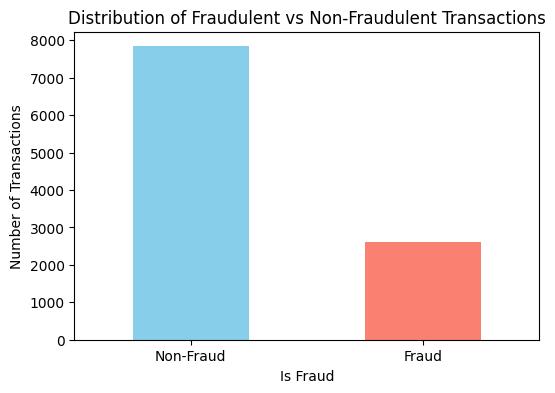

In [9]:
import matplotlib.pyplot as plt

# Plot the distribution of fraudulent vs non-fraudulent transactions
plt.figure(figsize=(6,4))
balanced_fraud_df['is_fraud'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Number of Transactions')
plt.xticks(ticks=[0,1], labels=['Non-Fraud', 'Fraud'], rotation=0)
plt.show()

# Stage 4

#### Fraud Visualisations

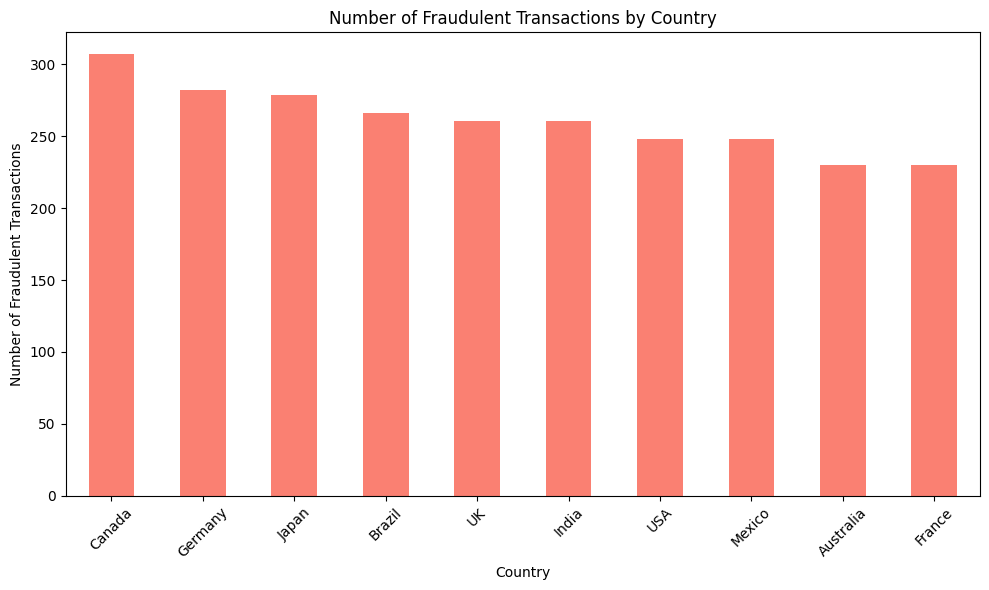

In [10]:
# Visualize fraudulent transactions by country
plt.figure(figsize=(10,6))
fraud_transactions['Country'].value_counts().plot(kind='bar', color='salmon')
plt.title('Number of Fraudulent Transactions by Country')
plt.xlabel('Country')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

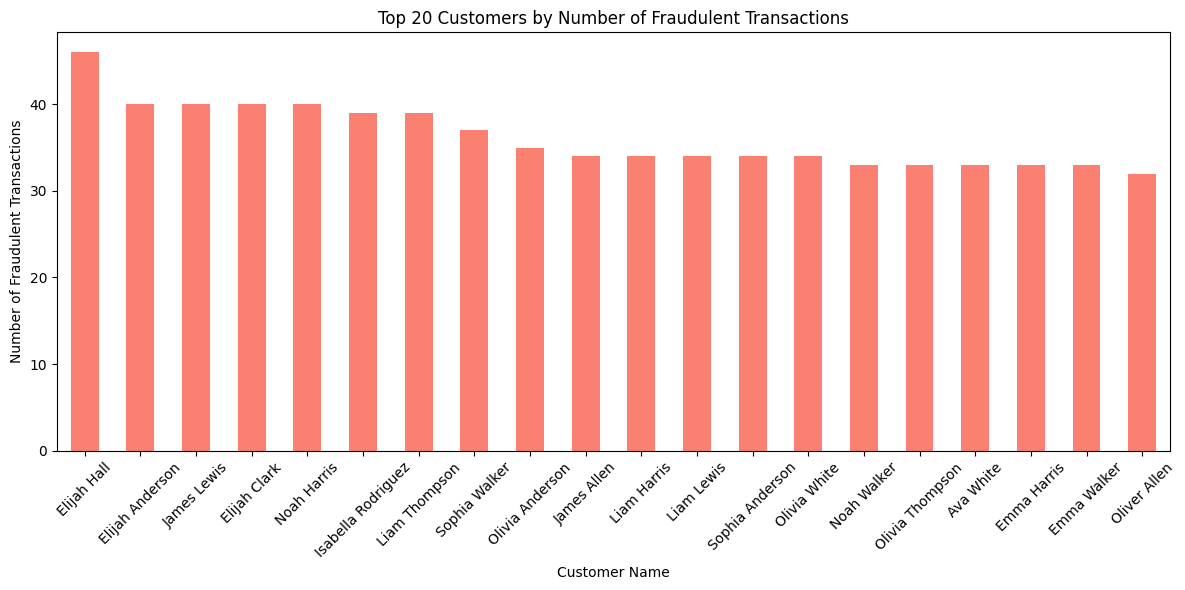

In [11]:
# Visualize the number of fraudulent transactions by customer name (top 20)
plt.figure(figsize=(12,6))
fraud_transactions['User_Name'].value_counts().head(20).plot(kind='bar', color='salmon')
plt.title('Top 20 Customers by Number of Fraudulent Transactions')
plt.xlabel('Customer Name')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
fig = px.bar(
    fraud_transactions['Country'].value_counts().reset_index(),
    x='Country',
    y='count',
    labels={'Country': 'Country', 'count': 'Number of Fraudulent Transactions'},
    title='Number of Fraudulent Transactions by Country (Plotly)'
)
fig.show()

In [12]:
summary = """
### Summary of Generated Information

- **Working Directory:** The notebook changes the working directory to its parent folder for easier file access.
- **Data Loading:** The cleaned e-commerce transactions dataset is loaded into a DataFrame named `fraud_df`.
- **Balancing:** The dataset is balanced by oversampling each class in the 'Segment' column to match the majority class size. The balanced data is stored in `balanced_fraud_df`.
- **Fraud Labeling:** A new column `is_fraud` is created in `balanced_fraud_df`, where transactions with `Segment == 1` are labeled as fraudulent.
- **Fraud Analysis:** Fraudulent transactions are filtered into `fraud_transactions`.
- **Visualizations:** The notebook includes visualizations for:
    - Distribution of fraudulent vs. non-fraudulent transactions.
    - Number of fraudulent transactions by country.
    - Top 20 customers by number of fraudulent transactions.
- **Variables:** Key variables include:
    - `fraud_df`: Original dataset.
    - `balanced_fraud_df`: Balanced dataset with fraud labels.
    - `fraud_transactions`: DataFrame of only fraudulent transactions.
    - `df_segment`, `df_segment_balanced`, `dfs`: Used for balancing by segment.
    - `majority_class`, `max_count`, `segment`: Helper variables for balancing.
"""

print(summary)


### Summary of Generated Information

- **Working Directory:** The notebook changes the working directory to its parent folder for easier file access.
- **Data Loading:** The cleaned e-commerce transactions dataset is loaded into a DataFrame named `fraud_df`.
- **Balancing:** The dataset is balanced by oversampling each class in the 'Segment' column to match the majority class size. The balanced data is stored in `balanced_fraud_df`.
- **Fraud Labeling:** A new column `is_fraud` is created in `balanced_fraud_df`, where transactions with `Segment == 1` are labeled as fraudulent.
- **Fraud Analysis:** Fraudulent transactions are filtered into `fraud_transactions`.
- **Visualizations:** The notebook includes visualizations for:
    - Distribution of fraudulent vs. non-fraudulent transactions.
    - Number of fraudulent transactions by country.
    - Top 20 customers by number of fraudulent transactions.
- **Variables:** Key variables include:
    - `fraud_df`: Original dataset.
    - `ba

### Explanation of the Visualisations

- **Distribution of Fraudulent vs Non-Fraudulent Transactions:**  
    This bar chart shows the count of transactions labeled as fraudulent (`is_fraud = 1`) versus non-fraudulent (`is_fraud = 0`). It helps to quickly assess the balance between the two classes after oversampling.

- **Fraudulent Transactions by Country:**  
    This bar chart displays the number of fraudulent transactions for each country. It highlights which countries have higher reported fraud cases, providing insights into geographic trends in fraudulent activity.

- **Top 20 Customers by Number of Fraudulent Transactions:**  
    This bar chart lists the top 20 customers (by name) with the most fraudulent transactions. It helps identify individuals who are most frequently associated with fraud, which can be useful for targeted investigation or further analysis.

#### AI Solutions, Analysis & Solving Domain Specific Problems 

#### AI has been used here to balance the dataset so that the outcomes are unbiased and therefore it is ethical. It has played its part in analysing the data and identifying a trend concerning fraud and customers who might be carrying this out. This will help the business to save money of which can be used to keep the buiness afloat during lean periods and prevent any losses being passed on to other customers and maintain a good trading relationship with suppliers also. Therefore AI is an important tool to use to help a business solve this issue it experiences in the online retail domain.

### Conclusion

#### The above shows that I have used Copilot to detect from from the dataset, and obtained insights regarding the country,individuals,and produced visualisations. There is an ethical issue here as customers names have been identified and this would breach GDPR regualtions. However in practice the customers details would be anonymized and polices would be made available regarding how data is stored, how it is used and when it will be deleted. When creating a customer account the customer would have to give their constent.